# JP Assessment
## Jonathan Epstein
## January 20, 2023

You are given a dataset to predict cognitive test scores of preschoolers given characteristics of their mothers.

Data dictionary:

* i - mother's IQ
* a - mother's age at child's birth
* h - indicator showing whether mother completed high school (1=True, 0=False)
* w = 1: mother did not work in first three years of child’s life
* w = 2: mother worked in second or third year of child’s life
* w = 3: mother worked part-time in first year of child’s life
* w = 4: mother worked full-time in first year of child’s life
* score - child's IQ (regressand)

## Parts I and II 

Prepare the data, rename variables as you see fit and justify. Propose the types of data for each variable (python data types).

Transform the data so it's easy to analyze - describe what you did and why.

In [2]:
#access data
from google.colab import drive 
drive.mount('/gdrive') #mount drive
#navigate to folder with data
%cd /gdrive/MyDrive/jobs/JP Morgan 
#!ls #list contents of folder

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/MyDrive/jobs/JP Morgan


In [3]:
# import data
import pandas as pd
import csv

#based on manual inspection, need pipe delimiter; normal encodings throws error, which latin-1 fixes
#https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html, https://docs.python.org/3/library/codecs.html#standard-encodings, https://stackoverflow.com/questions/39650407/pandas-read-csv-with-special-characters-accents-in-column-names
df = pd.read_csv('data.txt', delimiter="|", header=0, names=['index','variable','value'], index_col=0, encoding='latin-1', quoting=csv.QUOTE_NONE) #https://stackoverflow.com/questions/28284912/pandas-is-it-possible-to-read-csv-with-no-quotechar

df = df[~df['variable'].isin(['áº'])] #drop one corrupted row; btwn index 893 and 894, no need to reindex


print(df.shape)
df.head(5)

(2170, 2)


,variable,value
index,,
0,score,65
1,score,98
2,score,85
3,score,83
4,score,115


Problem: There is no unique ID for each mother, based on manual inspection of the .txt file. From counting the occurences of each variables below, it seems likely that there are 434 mothers in this dataset. And 434 observations * 5 variables = 2,170 rows. An assumption I make is that the data is ordered, so the first value for *score* corresponds to the first value of *h* as so on. In a real world application, I would reach out to the dataset provider to confirm this assumption. Another solution is to compare results to a similar dataset and/or priors. Or in this case, compare to another source of the data -- the Github repo for one of Andrew Gelman's textbooks: https://github.com/avehtari/ROS-Examples/blob/master/KidIQ/data/kidiq.csv and https://github.com/avehtari/ROS-Examples/blob/master/KidIQ/figs/kidiq.betasim2.pdf. 

In [4]:
df['variable'].value_counts() # count occurences of each variable. 434 occurences -> likely 434 observations

score    434
h        434
i        434
w        434
a        434
Name: variable, dtype: int64

Here I assign a new index, assuming that each observations variables are evenly spaced, eg rows 1 and 434 belong to the same observations.

In [5]:
index2 = []
n = int(len(df)/5)
print(n)
for x in range(n):
  index2.append(x)
for x in range(n):
  index2.append(x)
for x in range(n):
  index2.append(x)
for x in range(n):
  index2.append(x)
for x in range(n):
  index2.append(x)
print(len(index2))
print(index2)

434
2170
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 

In [6]:
df['index2'] = index2 #add new index to df; #https://stackoverflow.com/questions/26666919/add-column-in-dataframe-from-list
df.head(3)

,variable,value,index2
index,,,
0,score,65,0
1,score,98,1
2,score,85,2


In [8]:
df.tail(3) #see last 3 rows to confirm new index is appended properly

,variable,value,index2
index,,,
2167,a,24,431
2168,a,21,432
2169,a,25,433


A second problem is that the data is presented in a long format, which makes it less human readable and cumbersome to perform a regression on. See https://en.wikipedia.org/wiki/Wide_and_narrow_data. The solution is to transform the data table to wide format.

In [9]:
df2 = df.pivot(index='index2', columns='variable', values='value')
df2

variable,a,h,i,score,w
index2,,,,,
0,27,1,'121.117528602603',65,4
1,25,1,'89.3618817100663',98,4
2,27,1,'115.443164881725',85,4
3,25,1,'99.4496394360723',83,3
4,27,1,'92.7457099982118',115,4
...,...,...,...,...,...
429,21,0,'84.8774118257353',94,4
430,23,1,'92.9903917236843',76,4
431,24,0,'94.8597081943671',50,2


Another problem is the presence of quote characters, which are removed below

In [10]:
df2['i'] = df2['i'].str.replace('\'','') #replace quotes to enable conversion to float
df2['i'].head(2)

index2
0    121.117528602603
1    89.3618817100663
Name: i, dtype: object

Here I convert the data types to integers and floats to enable calculations and regressions.

In [11]:
df2.dtypes #inspect datatypes

variable
a        object
h        object
i        object
score    object
w        object
dtype: object

In [12]:
# change datatypes
df2['a'] = df2['a'].astype(int)
df2['h'] = df2['h'].astype(int)
df2['score'] = df2['score'].astype(int)
df2['w'] = df2['w'].astype(int)
df2['i'] = df2['i'].astype(float) #only column with decimals
df2.dtypes

variable
a          int64
h          int64
i        float64
score      int64
w          int64
dtype: object

In [13]:
# rename columns
df2 = df2.rename({'index2': 'id', 'a': 'age', 'h': 'hs_grad', 'w': 'work_history', 'i': 'mom_iq', 'score': 'child_iq'}, axis=1) 
df2.sample(3)

variable,age,hs_grad,mom_iq,child_iq,work_history
index2,,,,,
342,21,1,93.073715,64,4
277,20,1,120.609045,101,3
255,18,0,114.206686,98,2


## Part III

Perform the exploratory data analysis

These histograms illustrate the distribution of each feature, evidencing a good degree of variance that could enable us to produce a confident model.

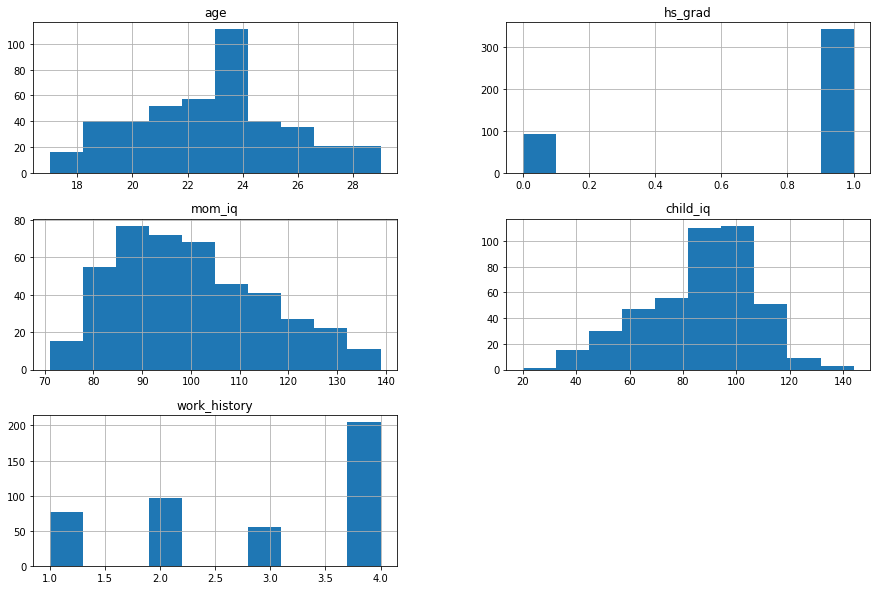

In [14]:
for x in [df2.columns]:
  df2[x].hist(figsize=(15, 10))

The heatmaps below give a sense of correlations between variables, enabling readers to get a quick sense of correlations.

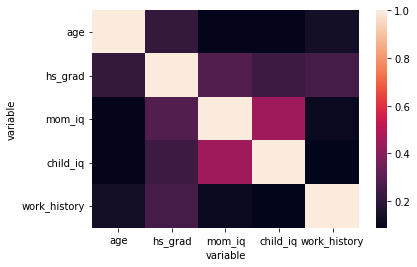

In [15]:
import seaborn as sns

corr = df2.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

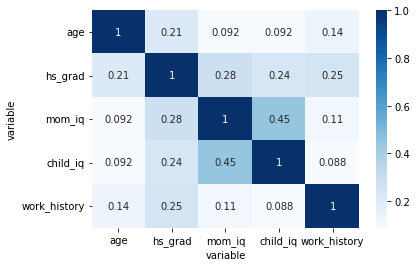

In [16]:
sns.heatmap(corr, cmap="Blues", annot=True)

These scatterplots with fitted regression lines illustrate relationships between the independent variables and child IQ. 

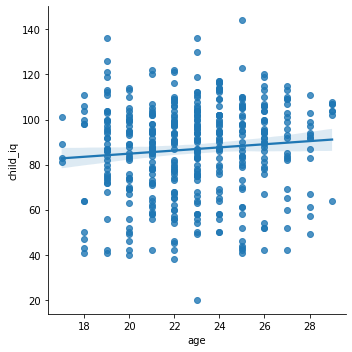

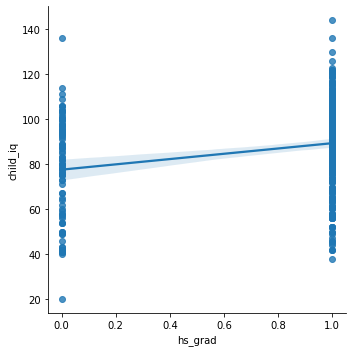

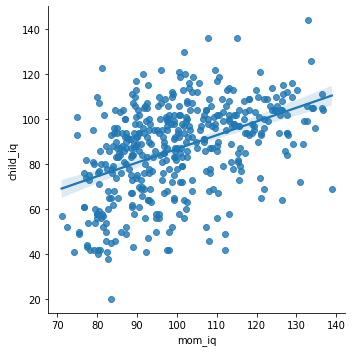

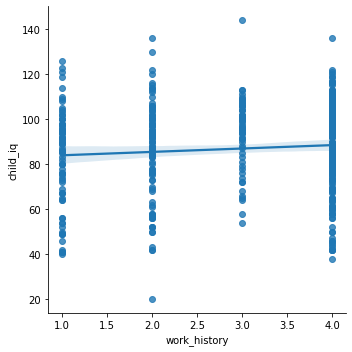

In [18]:
y = 'child_iq'
for x in df2.columns:
  if x != y:
    sns.lmplot(x=x,y=y,data=df2,fit_reg=True) #plot with a regression line

## Part IV

Perform a linear regression where the regressand is child's IQ
    
1. using a single predictor

2. using multiple predictors

3. using multiple predictors with an interaction term
    
For each case, explain your model, model assumptions and how to interpret the regression coefficients.

**Model I: Single Predictor**

In [29]:
import statsmodels.api as sm

y = df2['child_iq']
x = df2['mom_iq']
x = sm.add_constant(x) #add constant, per https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html and https://realpython.com/linear-regression-in-python/
x.head(3) #confirm constant added properly

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,mom_iq
index2,,
0,1.0,121.117529
1,1.0,89.361882
2,1.0,115.443165


In [30]:
model1 = sm.OLS(y, x) #single predictor model
results1 = model1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:               child_iq   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     108.6
Date:                Sat, 21 Jan 2023   Prob (F-statistic):           7.66e-23
Time:                        08:05:54   Log-Likelihood:                -1875.6
No. Observations:                 434   AIC:                             3755.
Df Residuals:                     432   BIC:                             3763.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.7998      5.917      4.360      0.0

This a simple univariate regression, which assumes that there is only one predictive independent variable. It measures the effect on the dependent variable (child_iq) of a change of one unit (one IQ point) of the independent variable (mom_iq), holding all else constant, which in this case is 0.61 IQ points. This result is statistically significant at the 99% confidence level, and explains 20% of variance.  

A few additional assumptions inherent in this model, and applicable to subsequent models are:


*   Validity: Does the model generalize? Does it include all relevant predictors?
*   Representativeness: Does the sample represent the broader population we want to make inferences about?
*   Linearity: Are these functions linear, or does the slope increase at different rates? Are there U-shaped patterns?





**Model II: Multiple Predictors**

In [31]:
y = df2['child_iq']
x = df2[['mom_iq','age','hs_grad']]
x = sm.add_constant(x) #add constant, per https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html and https://realpython.com/linear-regression-in-python/
x.head(3)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,mom_iq,age,hs_grad
index2,,,,
0,1.0,121.117529,27,1
1,1.0,89.361882,25,1
2,1.0,115.443165,27,1


In [32]:
model2 = sm.OLS(y, x)
results2 = model2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:               child_iq   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     39.25
Date:                Sat, 21 Jan 2023   Prob (F-statistic):           1.94e-22
Time:                        08:06:48   Log-Likelihood:                -1871.8
No. Observations:                 434   AIC:                             3752.
Df Residuals:                     430   BIC:                             3768.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.9847      9.130      2.298      0.0

This model uses three independent variables to explain child_iq. Holding all else constant, an increase of one point in mom_iq leads to an increase of child_iq of 0.56 points. An increase of age (mother's age at child's birth) of one year leads to a .22 point child_iq increase. If a mom graduated high school, it leads (on average) to a 5.65 point child_iq increase. 

While the coefficient on mom_iq is significant at the 99% confidence level, and the coefficient on hs_grad is significant at the 95% confidence level, the coefficient on age is not statistically significant, potentially because of multicollinearity. 22% of variance is explained by this model.

I left out the work history variable because it was unclear if we could assume ordinality of the values. Creating dummy variables would solve this problem.

**Model III: Multiple Predictors with Interaction Term**

In [35]:
import statsmodels.formula.api as smf

#https://www.statsmodels.org/devel/example_formulas.html for interaction terms
results3 = smf.ols(formula='child_iq ~ hs_grad * age + mom_iq', data=df2).fit()
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:               child_iq   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     30.62
Date:                Sat, 21 Jan 2023   Prob (F-statistic):           1.95e-22
Time:                        09:04:30   Log-Likelihood:                -1869.8
No. Observations:                 434   AIC:                             3750.
Df Residuals:                     429   BIC:                             3770.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      48.4793     16.598      2.921      

This model builds on the second model and introduces an interaction term, hs_grad:age. Typically interaction terms are used with categorial and/or boolean variables; using them with a continuous variable makes interpretation more difficult (but not impossible). Interaction terms measure the effect, holding all else constant, of going from a baseline where the interaction term is effectively zero (e.g. not a high school grad) to being a hs_grad, at the same time as the variable being interacted with changes. 

Mom_iq is significant at the 99% level, and the interaction term is significantat the 95% level, but the other terms (besides the intercept) are not significant. 22% of variance is explained by this model.